<a href="https://colab.research.google.com/github/17092003vamsi/HUNTERs/blob/main/finaly%20completed%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
✅ Total samples: 909, Total classes: 4
✅ Training Accuracy: 100.00%
✅ Testing Accuracy: 89.56%

✅ Classification Report:
                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       1.00      1.00      1.00        46
     ECG Images of Patient that have History of MI (172x12=2064)       0.94      0.85      0.89        34
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.92      0.73      0.81        45
                          Normal Person ECG Images (284x12=3408)       0.80      0.96      0.87        57

                                                        accuracy                           0.90       182
                                                       macro avg       0.91      0.89      0.90       182
                                                    weighted avg       0.90      0.90      0.89       182



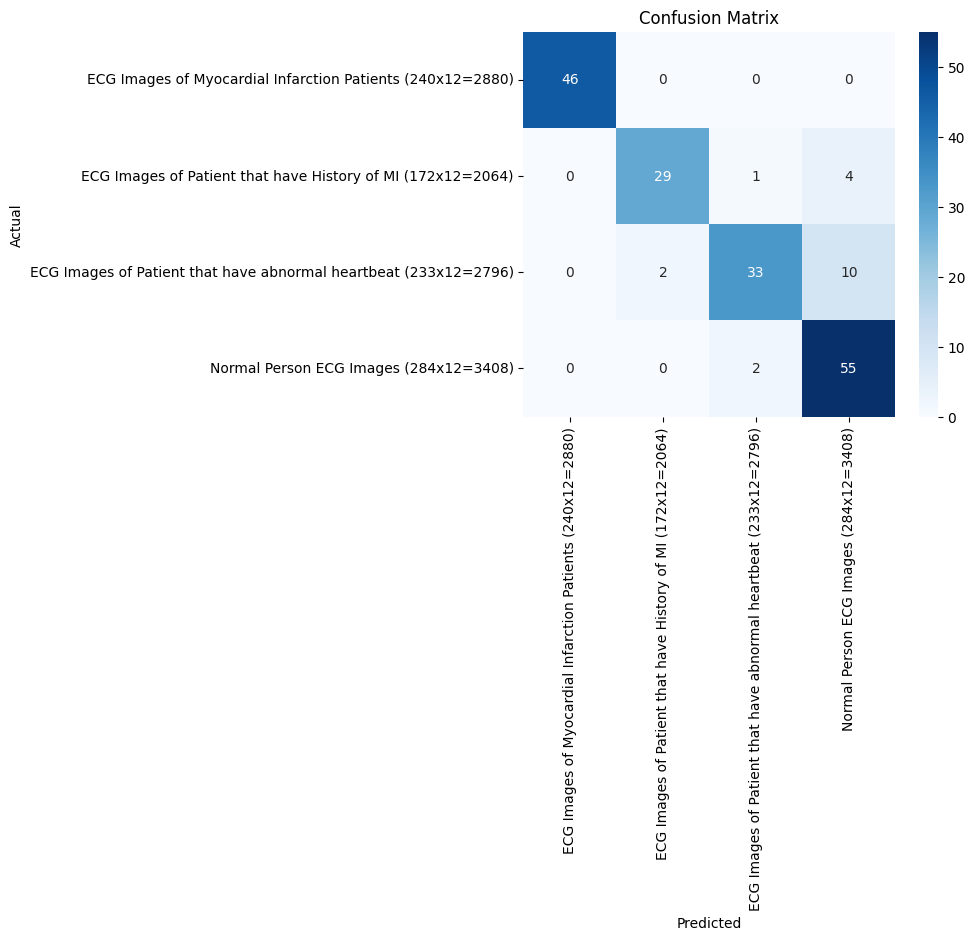

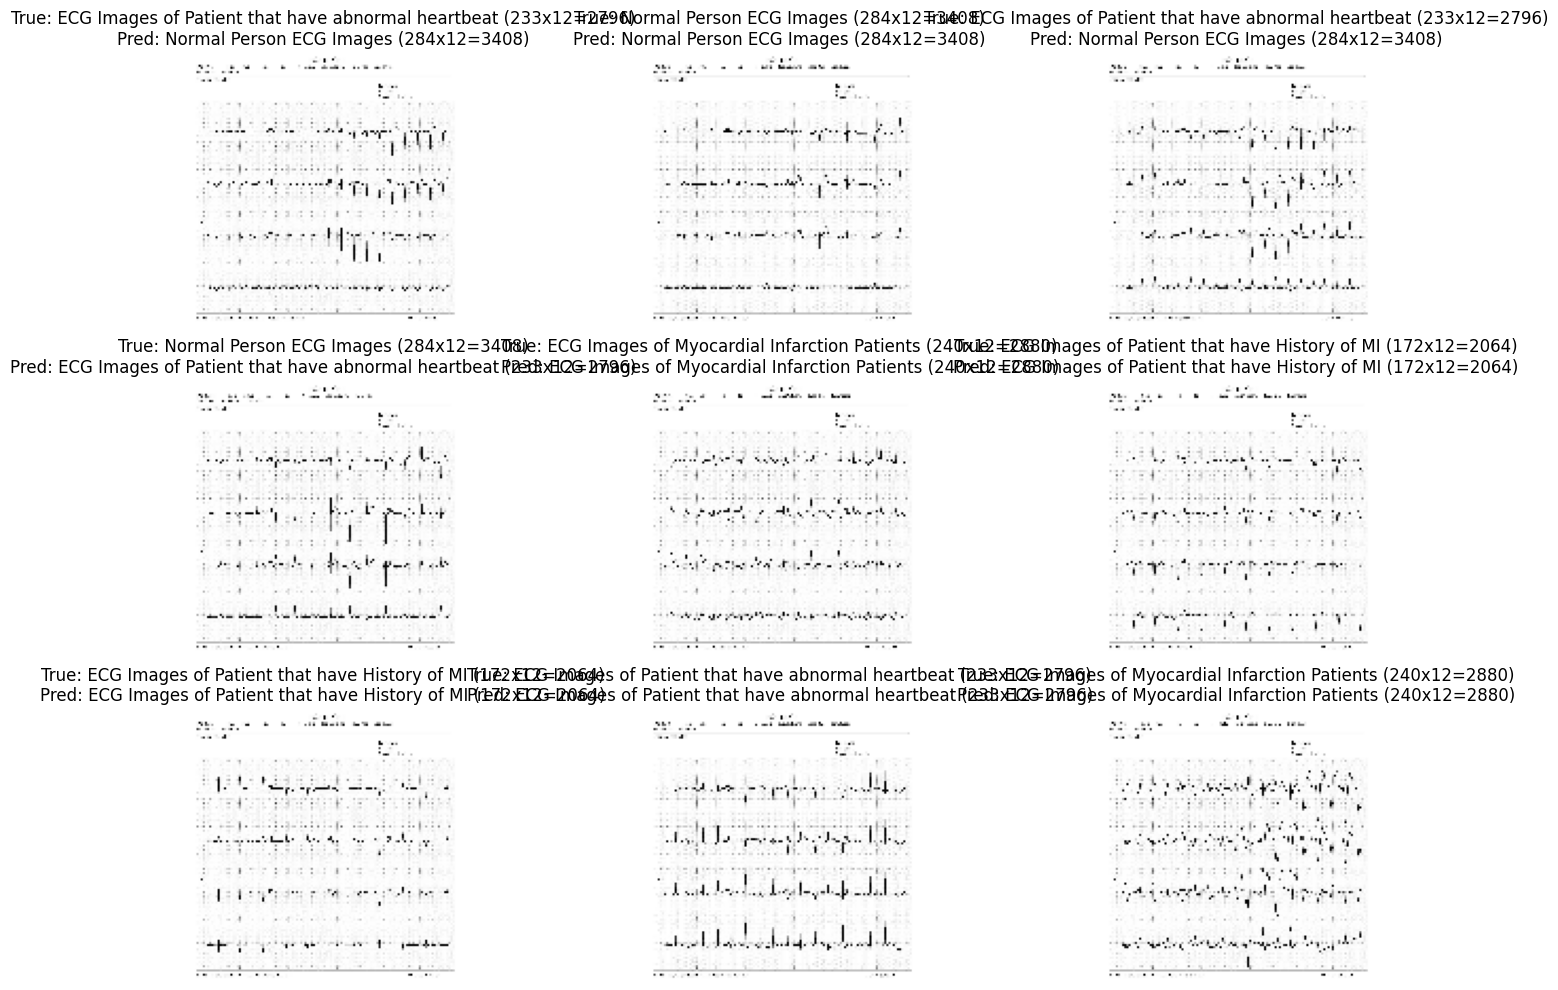

✅ Model saved to: /content/drive/MyDrive/ecg_rf_model.pkl


In [1]:
# ✅ Install Required Libraries
!pip install -q scikit-image opencv-python

# ✅ Imports
import os
import cv2
import joblib
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import seaborn as sns

# ✅ Mount Google Drive
drive.mount('/content/drive')

# ✅ Parameters
IMG_SIZE = (128, 128)
DATASET_PATH = "/content/drive/MyDrive/dataset of ecg project"
CATEGORIES = sorted(os.listdir(DATASET_PATH))

# ✅ Data Preparation
X, y, images = [], [], []
label_map = {cat: idx for idx, cat in enumerate(CATEGORIES)}

for label in CATEGORIES:
    folder = os.path.join(DATASET_PATH, label)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True)
            X.append(features)
            y.append(label_map[label])
            images.append(img)

X = np.array(X)
y = np.array(y)
images = np.array(images)
print(f"✅ Total samples: {len(X)}, Total classes: {len(CATEGORIES)}")

# ✅ Train/Test Split
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X, y, images, test_size=0.2, stratify=y, random_state=42)

# ✅ Train Random Forest
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# ✅ Accuracy
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print(f"✅ Training Accuracy: {train_acc * 100:.2f}%")
print(f"✅ Testing Accuracy: {test_acc * 100:.2f}%")

# ✅ Classification Report
y_pred = model.predict(X_test)
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=CATEGORIES))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Sample Predictions
plt.figure(figsize=(15, 10))
for i in range(9):
    img = img_test[i]
    true_label = CATEGORIES[y_test[i]]
    pred_label = CATEGORIES[y_pred[i]]
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# ✅ Save Model
model_path = '/content/drive/MyDrive/ecg_rf_model.pkl'
joblib.dump(model, model_path)
print(f"✅ Model saved to: {model_path}")
